In [1]:
# пример кластеризации с помощью алгоритма kmeans

In [2]:
# импорт
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn import metrics

In [3]:
# получение данных 
# (так как они копируют получение данных в 2, то загрузим сохраненный обработанный датасет)
df_rename = pd.read_csv('../data/gdelt_counts_event_by_day_clear.csv', index_col='date', parse_dates=['date']);

In [4]:
df_rename

MAKE PUBLIC STATEMENT   APPEAL  EXPRESS INTENT TO COOPERATE  \
date                                                                      
2019-01-01                11723.0   6142.0                       5348.0   
2019-01-02                17471.0   9285.0                       8509.0   
2019-01-03                21050.0  10438.0                      10658.0   
2019-01-04                20850.0  10612.0                      10245.0   
2019-01-05                13955.0   6834.0                       6409.0   
2019-01-06                11880.0   6193.0                       5911.0   
2019-01-07                19766.0  10068.0                       9689.0   
2019-01-08                24363.0  12079.0                      12343.0   
2019-01-09                26014.0  13082.0                      13444.0   
2019-01-10                24943.0  12897.0                      13480.0   
2019-01-11                24529.0  12061.0                      12562.0   
2019-01-12                16189.0   7883.0                       7519.0   
2019-01-13                14061.0   7003.0                       6729.0   
2019-01-14                22013.0  11398.0                      11879.0   
2019-01-15                26468.0  13552.0                      12857.0   
2019-01-16                27274.0  14278.0                      13861.0   
2019-01-17                27131.0  13510.0                      13395.0   
2019-01-18                25752.0  12730.0                      13315.0   
2019-01-19                17069.0   8711.0                       8246.0   
2019-01-20                13733.0   7343.0                       6315.0   
2019-01-21                20679.0  10574.0                      10674.0   
2019-01-22                24780.0  12808.0                      12307.0   
2019-01-23                26855.0  13578.0                      13503.0   
2019-01-24                27193.0  13911.0                      13548.0   
2019-01-25                25194.0  13301.0                      12452.0   
2019-01-26                16241.0   8290.0                       7204.0   
2019-01-27                14118.0   7038.0                       6261.0   
2019-01-28                22571.0  11984.0                      11111.0   
2019-01-29                27457.0  14299.0                      13611.0   
2019-01-30                27923.0  14607.0                      13980.0   
...                           ...      ...                          ...   
2019-12-02                19015.0  10057.0                      10244.0   
2019-12-03                23382.0  11982.0                      12537.0   
2019-12-04                24784.0  12771.0                      12336.0   
2019-12-05                23804.0  12268.0                      11865.0   
2019-12-06                22321.0  11245.0                      10755.0   
2019-12-07                14219.0   7064.0                       6214.0   
2019-12-08                12169.0   6146.0                       5511.0   
2019-12-09                20249.0  10770.0                      10373.0   
2019-12-10                24138.0  13071.0                      12945.0   
2019-12-11                24221.0  12554.0                      11173.0   
2019-12-12                23315.0  12532.0                      11343.0   
2019-12-13                22464.0  11671.0                      11204.0   
2019-12-14                13255.0   6988.0                       6035.0   
2019-12-15                11644.0   5946.0                       5198.0   
2019-12-16                18732.0  10042.0                       9356.0   
2019-12-17                22278.0  11997.0                      10382.0   
2019-12-18                22853.0  11972.0                      10369.0   
2019-12-19                22011.0  11948.0                      10430.0   
2019-12-20                21205.0  11337.0                      10156.0   
2019-12-21                13388.0   7006.0                       6075.0   
2019-12-22                10959.0   5

In [5]:
# первой нашей задачей является поиск оптимального числа кластеров

In [6]:
# воспользуемся признаком силуэта кластера.
# Силуэтом выборки называется средняя величина силуэта объектов данной выборки. 
# Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. 
# Данная величина лежит в диапазоне jn -1 до 1. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам.
# выбираем число кластеров, которое максимумизирует значение метрики
clusters = {}
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_rename)
    clusters[n_clusters] = metrics.silhouette_score(df_rename, kmeans.labels_)

print('Максимум силуэта достигается при числе кластеров = ',max(clusters, key=clusters.get))

Максимум силуэта достигается при числе кластеров =  2


In [7]:
# альтернативным способом выявления числа кластеров может служить построение дендрограммы

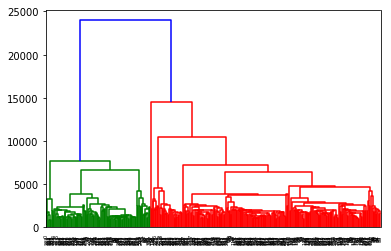

In [8]:
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(df_rename, method='centroid')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings)

plt.show()

In [9]:
# попробуем применить кластеризацию и получить центры кластеров
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_rename)
print('Центры кластеров')
print(kmeans.cluster_centers_)

Центры кластеров
[[1.44746917e+04 7.30735833e+03 6.81639167e+03 2.56504500e+04
  8.29655833e+03 2.22789167e+03 3.33827500e+03 3.85777500e+03
  2.06359167e+03 1.30023333e+03 6.78815833e+03 2.58900833e+03
  1.52669167e+03 1.20000000e+03 3.45658333e+02 9.92775000e+02
  5.08659167e+03 1.64345833e+03 6.77912500e+03 4.07583333e+01]
 [2.46427633e+04 1.26694367e+04 1.24554980e+04 4.27844816e+04
  1.41196816e+04 4.11567347e+03 5.96685306e+03 6.50808980e+03
  3.59024898e+03 2.22442041e+03 1.15387592e+04 4.58219184e+03
  2.56746122e+03 1.67399592e+03 5.25820408e+02 1.64919184e+03
  8.74667755e+03 2.66349796e+03 9.89096735e+03 6.39306122e+01]]
